In [1]:
import matplotlib.pyplot as plt
import numpy as np

from data_analysis_helper_functions import *


the first datapoint with short rise time looks linke numerical jank, should discard it

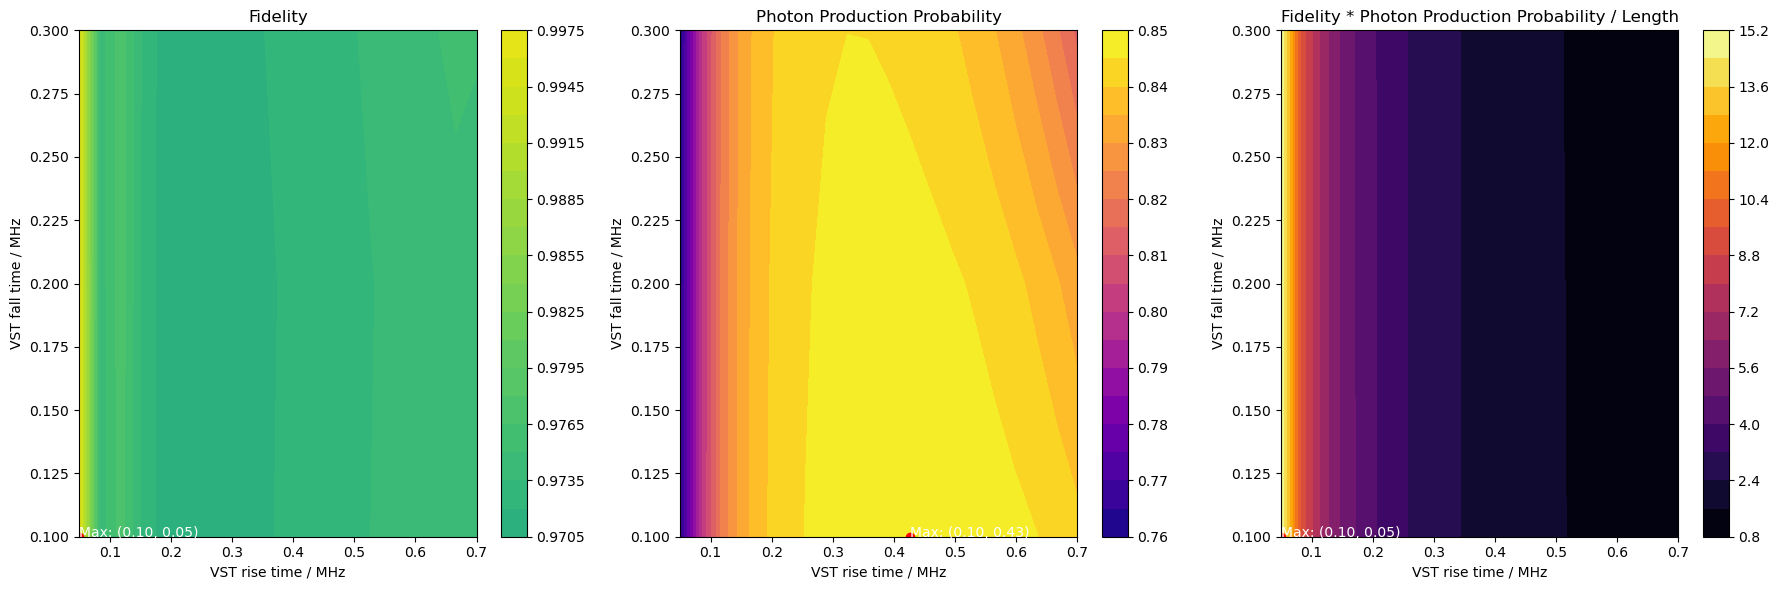

Max fidelity is 0.9966027315420628
Max fidelity at risetime = 0.05, falltime = 0.1
Max diagonal is 0.8486188743388848
Max diagonal at risetime = 0.42631578947368415, falltime = 0.1


In [2]:
unique_omegas, unique_lengths, fidelity_grid, diagonal_grid=process_bm_grid_time("photon_correlations/far_detuned/n_1/omegavst_bm_risetime_grid/n1_results_nstart2*.pkl")
diagonal_grid = diagonal_grid * 2 * 2.1 * 2 * np.pi

# Compute the product of fidelity and diagonal sum
product_grid = fidelity_grid * diagonal_grid

# Create the meshgrid for omegas and lengths
O, L = np.meshgrid(unique_lengths, unique_omegas)

plot_grid = fidelity_grid * diagonal_grid / O

# Compute the maximum and location for each grid
max_fidelity_idx = np.unravel_index(np.argmax(fidelity_grid), fidelity_grid.shape)
max_fidelity_omega = unique_omegas[max_fidelity_idx[0]]
max_fidelity_length = unique_lengths[max_fidelity_idx[1]]
max_fidelity_value = fidelity_grid[max_fidelity_idx]

max_diagonal_idx = np.unravel_index(np.argmax(diagonal_grid), diagonal_grid.shape)
max_diagonal_omega = unique_omegas[max_diagonal_idx[0]]
max_diagonal_length = unique_lengths[max_diagonal_idx[1]]
max_diagonal_value = diagonal_grid[max_diagonal_idx]

max_plot_idx = np.unravel_index(np.argmax(plot_grid), plot_grid.shape)
max_plot_omega = unique_omegas[max_plot_idx[0]]
max_plot_length = unique_lengths[max_plot_idx[1]]
max_plot_value = plot_grid[max_plot_idx]

# Create the meshgrid for omegas and lengths
O, L = np.meshgrid(unique_lengths, unique_omegas)

# Create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# First plot: Absolute fidelity
c1 = axs[0].contourf(O,
                     L,
                     fidelity_grid,
                     levels=20,
                     cmap='viridis',
                     vmin=0.92,
                     vmax=1)
axs[0].set_title('Fidelity')
axs[0].set_xlabel('VST rise time / MHz')
axs[0].set_ylabel('VST fall time / MHz')
fig.colorbar(c1, ax=axs[0])

# Mark the maximum point for fidelity
axs[0].plot(max_fidelity_length, max_fidelity_omega, 'ro')  # Red circle
axs[0].text(max_fidelity_length, max_fidelity_omega, f'Max: ({max_fidelity_omega:.2f}, {max_fidelity_length:.2f})',
            color='white')

# Second plot: Diagonal sum
c2 = axs[1].contourf(O, L, diagonal_grid, levels=20, cmap='plasma')
axs[1].set_title('Photon Production Probability')
axs[1].set_xlabel('VST rise time / MHz')
axs[1].set_ylabel('VST fall time / MHz')
fig.colorbar(c2, ax=axs[1])

# Mark the maximum point for diagonal sum
axs[1].plot(max_diagonal_length, max_diagonal_omega, 'ro')  # Red circle
axs[1].text(max_diagonal_length, max_diagonal_omega, f'Max: ({max_diagonal_omega:.2f}, {max_diagonal_length:.2f})',
            color='white')

# Third plot: Product of fidelity and photon production probability
c3 = axs[2].contourf(O, L, plot_grid, levels=20, cmap='inferno')
axs[2].set_title('Fidelity * Photon Production Probability / Length')
axs[2].set_xlabel('VST rise time / MHz')
axs[2].set_ylabel('VST fall time / MHz')
fig.colorbar(c3, ax=axs[2])

# Mark the maximum point for plot_grid
axs[2].plot(max_plot_length, max_plot_omega, 'ro')  # Red circle
axs[2].text(max_plot_length, max_plot_omega, f'Max: ({max_plot_omega:.2f}, {max_plot_length:.2f})',
            color='white')

plt.tight_layout()
plt.show()

# Print the maximum product point
print(f"Max fidelity is {np.max(fidelity_grid)}")
print(
    f"Max fidelity at risetime = {max_fidelity_length}, falltime = {max_fidelity_omega}"
)
print(f"Max diagonal is {np.max(diagonal_grid)}")
print(
    f"Max diagonal at risetime = {max_diagonal_length}, falltime = {max_diagonal_omega}"
)


0.2
[[0.49821979 0.4322647 ]
 [0.4322647  0.50178021]]
0.3181818181818182
[[0.49814358 0.44690902]
 [0.44690902 0.50185642]]
0.4363636363636364
[[0.49809061 0.45564171]
 [0.45564171 0.50190939]]
0.5545454545454546
[[0.49785951 0.46222921]
 [0.46222921 0.50214049]]
0.6727272727272727
[[0.4978652  0.46604198]
 [0.46604198 0.5021348 ]]
0.790909090909091
[[0.49796876 0.47006544]
 [0.47006544 0.50203124]]
0.9090909090909092
[[0.49805587 0.47336287]
 [0.47336287 0.50194413]]
1.0272727272727273
[[0.49816564 0.47466942]
 [0.47466942 0.50183436]]
1.1454545454545455
[[0.49823861 0.47852122]
 [0.47852122 0.50176139]]
1.2636363636363637
[[0.49830911 0.48059357]
 [0.48059357 0.50169089]]
1.3818181818181818
[[0.49831607 0.482954  ]
 [0.482954   0.50168393]]
1.5
[[0.49836805 0.48514372]
 [0.48514372 0.50163195]]


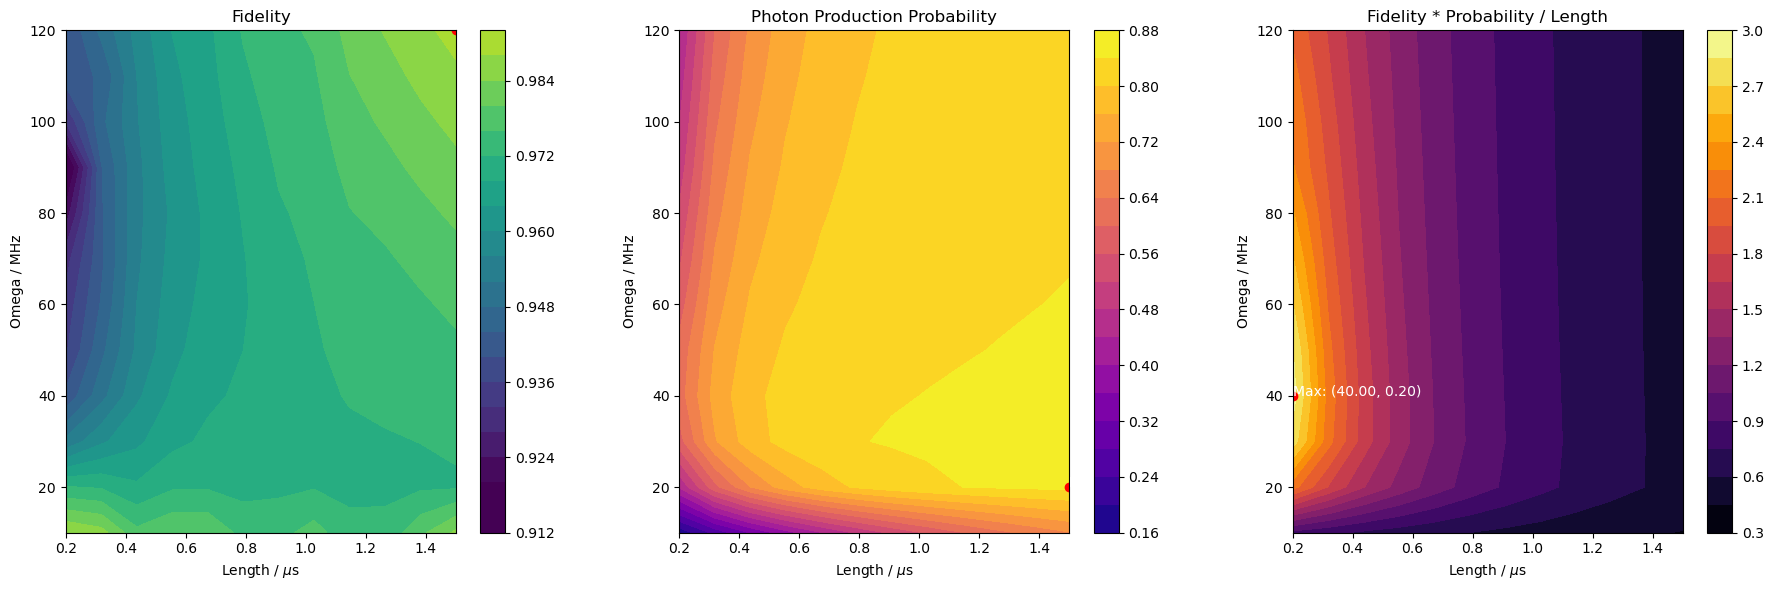

Max fidelity is 0.9892993471837169
Max fidelity at length = 1.5, omega = 120.0
Max diagonal is 0.8500352421311873
Max diagonal at length = 1.5, omega = 20.0


In [3]:
unique_omegas, unique_lengths, fidelity_grid, diagonal_grid = process_omega_grid(
    'photon_correlations/far_detuned/n_1/vst_length_omega_grid/n1_results_nstart2*.pkl'
)

# Ensure unique_omegas, unique_lengths, fidelity_grid, and diagonal_grid are preprocessed
diagonal_grid = diagonal_grid * 2 * 2.1 * 2 * np.pi

# Create the meshgrid
O, L = np.meshgrid(unique_lengths, unique_omegas)

# Compute the product grid
product_grid = fidelity_grid * diagonal_grid
plot_grid = fidelity_grid * diagonal_grid / O

# Find the maxima for each grid
max_fidelity_idx = np.unravel_index(np.argmax(fidelity_grid), fidelity_grid.shape)
max_fidelity_omega = unique_omegas[max_fidelity_idx[0]]
max_fidelity_length = unique_lengths[max_fidelity_idx[1]]

max_diagonal_idx = np.unravel_index(np.argmax(diagonal_grid), diagonal_grid.shape)
max_diagonal_omega = unique_omegas[max_diagonal_idx[0]]
max_diagonal_length = unique_lengths[max_diagonal_idx[1]]

max_plot_idx = np.unravel_index(np.argmax(plot_grid), plot_grid.shape)
max_plot_omega = unique_omegas[max_plot_idx[0]]
max_plot_length = unique_lengths[max_plot_idx[1]]


# Separate scatter plots for maxima
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Maximum of fidelity
c1 = axs[0].contourf(O, L, fidelity_grid, levels=20, cmap='viridis', vmin=0.92, vmax=1)
axs[0].set_title('Fidelity')
axs[0].set_xlabel('Length / $\mu$s')
axs[0].set_ylabel('Omega / MHz')
fig.colorbar(c1, ax=axs[0])

# Mark the maximum point for fidelity
axs[0].plot(max_fidelity_length, max_fidelity_omega, 'ro')  # Red circle
axs[0].text(max_fidelity_length, max_fidelity_omega, f'Max: ({max_fidelity_omega:.2f}, {max_fidelity_length:.2f})',
            color='white')

# Maximum of diagonal grid
c2=axs[1].contourf(O, L, diagonal_grid, levels=20, cmap='plasma')
axs[1].set_title('Photon Production Probability')
axs[1].set_xlabel('Length / $\mu$s')
axs[1].set_ylabel('Omega / MHz')
fig.colorbar(c2, ax=axs[1])

# Mark the maximum point for diagonal sum
axs[1].plot(max_diagonal_length, max_diagonal_omega, 'ro')  # Red circle
axs[1].text(max_diagonal_length, max_diagonal_omega, f'Max: ({max_diagonal_omega:.2f}, {max_diagonal_length:.2f})',
            color='white')

# Maximum of product grid
c3=axs[2].contourf(O, L, plot_grid, levels=20, cmap='inferno')
axs[2].set_title('Fidelity * Probability / Length')
axs[2].set_xlabel('Length / $\mu$s')
axs[2].set_ylabel('Omega / MHz')
fig.colorbar(c3, ax=axs[2])

# Mark the maximum point for plot_grid
axs[2].plot(max_plot_length, max_plot_omega, 'ro')  # Red circle
axs[2].text(max_plot_length, max_plot_omega, f'Max: ({max_plot_omega:.2f}, {max_plot_length:.2f})',
            color='white')

plt.tight_layout()
plt.show()


# Print the maximum product point
print(f"Max fidelity is {np.max(fidelity_grid)}")
print(
    f"Max fidelity at length = {max_fidelity_length}, omega = {max_fidelity_omega}"
)
print(f"Max diagonal is {np.max(diagonal_grid)}")
print(
    f"Max diagonal at length = {max_diagonal_length}, omega = {max_diagonal_omega}"
)


Now we analyse the variation of the fidelity with the two photon detuning of the stirap repreparation and the b field to look at the effect of the relative phase evolution

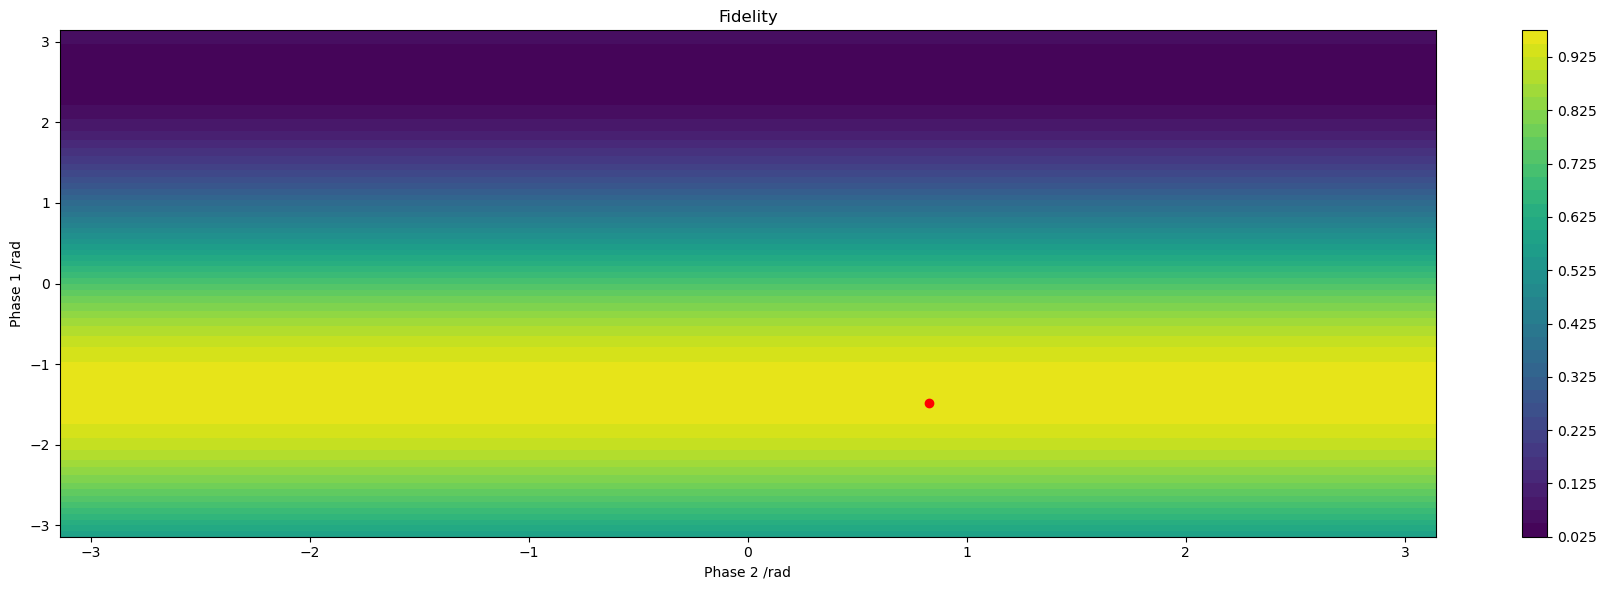

Max fidelity is 0.9724979619540673
Max fidelity at phase 1 = -1.4881228359109546, phase 2 = 0.8267349088394189


In [4]:
detunings, bfields, fidelities= process_phase_phase("photon_correlations/far_detuned/n_1/phase_grid/n1_results_nstart2*.pkl")
# Create the meshgrid
O, L = np.meshgrid(bfields, detunings)

# Find the maxima for each grid
max_fidelity_idx = np.unravel_index(np.argmax(fidelities), fidelities.shape)
max_fidelity_detunings = detunings[max_fidelity_idx[0]]
max_fidelity_bfields = bfields[max_fidelity_idx[1]]

# Separate scatter plots for maxima
fig, axs = plt.subplots(1, 1, figsize=(18, 6))

# Maximum of fidelity
c1 = axs.contourf(O, L, fidelities, levels=40, cmap='viridis', vmax=1)
axs.set_title('Fidelity')
axs.set_ylabel('Phase 1 /rad')
axs.set_xlabel('Phase 2 /rad')
fig.colorbar(c1)

# Mark the maximum point for fidelity
axs.plot(max_fidelity_bfields, max_fidelity_detunings, 'ro')  # Red circle

plt.tight_layout()
plt.show()


# Print the maximum product point
print(f"Max fidelity is {np.max(fidelities)}")
print(
    f"Max fidelity at phase 1 = {max_fidelity_detunings}, phase 2 = {max_fidelity_bfields}"
)


add a detuning b field analysis

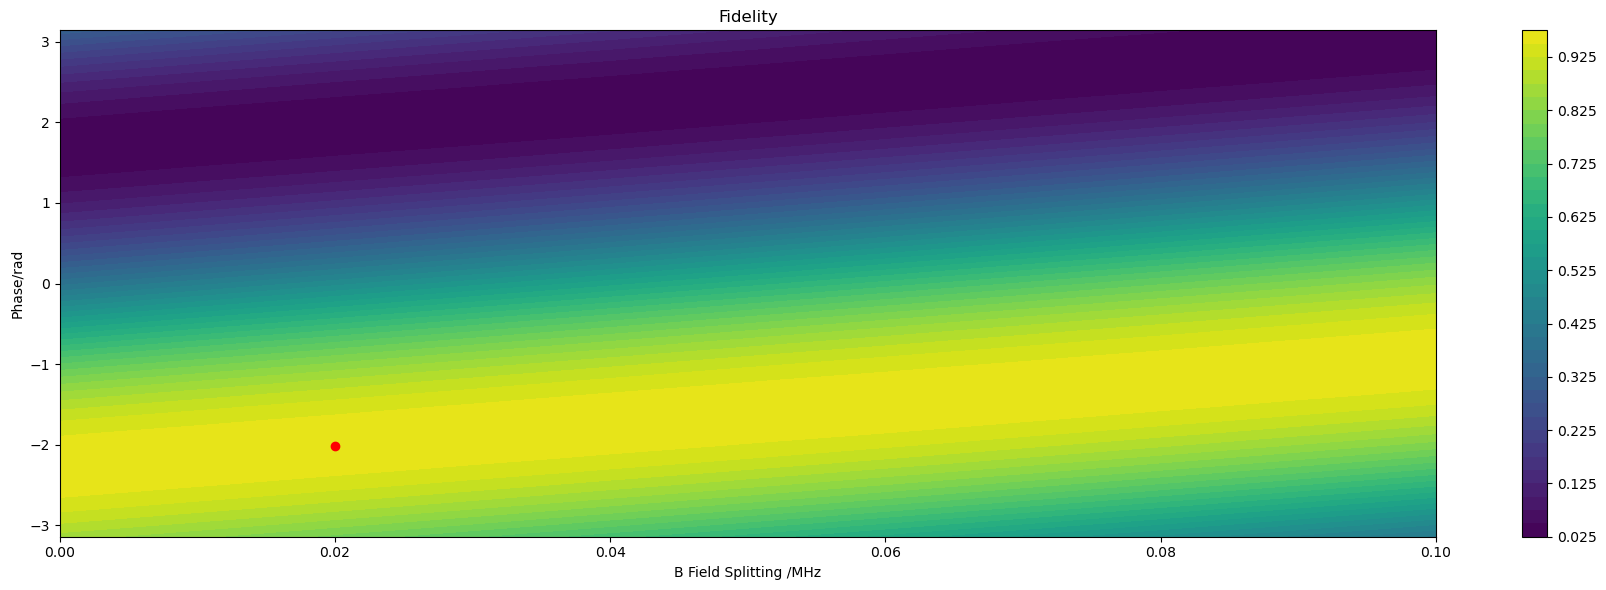

Max fidelity is 0.9715165293040096
Max fidelity at phase 1 = -2.0138414446088415, phase 2 = 0.02


In [7]:
detunings, bfields, fidelities= process_detuning_bfield("photon_correlations/far_detuned/n_1/det_b_field_grid/")

# Create the meshgrid
O, L = np.meshgrid(bfields, detunings)

# Find the maxima for each grid
max_fidelity_idx = np.unravel_index(np.argmax(fidelities), fidelities.shape)
max_fidelity_detunings = detunings[max_fidelity_idx[0]]
max_fidelity_bfields = bfields[max_fidelity_idx[1]]

# Separate scatter plots for maxima
fig, axs = plt.subplots(1, 1, figsize=(18, 6))

# Maximum of fidelity
c1 = axs.contourf(O, L, fidelities, levels=40, cmap='viridis', vmax=1)
axs.set_title('Fidelity')
axs.set_ylabel('Phase/rad')
axs.set_xlabel('B Field Splitting /MHz')
fig.colorbar(c1)

# Mark the maximum point for fidelity
axs.plot(max_fidelity_bfields, max_fidelity_detunings, 'ro')  # Red circle

plt.tight_layout()
plt.show()


# Print the maximum product point
print(f"Max fidelity is {np.max(fidelities)}")
print(
    f"Max fidelity at phase 1 = {max_fidelity_detunings}, phase 2 = {max_fidelity_bfields}"
)
